In [243]:
%pip install tabulate
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler
from colorama import Fore
from sklearn import metrics
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA 
import math
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Lý thuyết mô hình Linear Regression

Mô hình Linear Regression là một phương pháp học máy cơ bản được sử dụng để dự đoán mối quan hệ tuyến tính giữa các biến. Mô hình giả định rằng có một mối quan hệ tuyến tính giữa các biến đầu vào (đặc trưng) và biến đầu ra (mục tiêu).

**Công thức tổng quát:**

   y = b + w1*x1 + w2*x2 + ... + wn*xn

   Trong đó:
    * y là biến mục tiêu (biến cần dự đoán).
    * x1, x2, ..., xn là các biến đầu vào (đặc trưng).
    * w1, w2, ..., wn là các trọng số (coefficients) của các biến đầu vào.
    * b là hệ số chặn (intercept).


In [310]:
# Load the dataset train, val, test from ../clean_data
trainset = pd.read_csv('../clean_data/train_cleaned.csv')
valset = pd.read_csv('../clean_data/val_cleaned.csv')
testset = pd.read_csv('../clean_data/test_cleaned.csv')

print(f"Kích thước dữ liệu huấn luyện: {trainset.shape}")
print(f"Kích thước dữ liệu kiểm định: {valset.shape}")
print(f"Kích thước dữ liệu kiểm tra: {testset.shape}")

trainset.head(5)

Kích thước dữ liệu huấn luyện: (8946, 55)
Kích thước dữ liệu kiểm định: (1917, 55)
Kích thước dữ liệu kiểm tra: (1918, 55)


,Duration,Date,Total_Stops,SClass,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Airline_Bamboo Airways,...,Destination_TBB,Destination_THD,Destination_UIH,Destination_VCA,Destination_VCL,Destination_VCS,Destination_VDH,Destination_VDO,Destination_VII,Destination_VKG
0,-0.171875,18,0,0,2654000,19,50,21,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.796875,18,1,0,8983000,9,15,15,40,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.140625,17,1,1,1735000,9,50,18,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.156250,17,0,0,1859000,9,50,11,10,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.171875,15,0,1,2536000,12,5,13,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [286]:
def models_score(x_train, x_val, y_train, y_val):    
    models = {
        "Linear": LinearRegression(),
         }
    evalutes = {}
    i = 0
    maes = []
    rmse = []
    mape = []
    names = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_val) 
        names.append(name)
        maes.append(mean_absolute_error(y_val,y_pred))
        rmse.append(math.sqrt(mean_squared_error(y_val,y_pred)))
        mape.append(mean_absolute_percentage_error(y_val, y_pred))
    evalutes = {'Algorithms': names, 'MAE': maes, 'RMSE': rmse, "MAPE":mape}
    model_scores = pd.DataFrame(evalutes)
    return model_scores

In [285]:
X_train = trainset.drop(columns=['Price'])
y_train = trainset['Price']

X_val = valset.drop(columns=['Price'])
y_val = valset['Price']

# X_test = testset.drop(columns=['Price'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

In [247]:
score = models_score(X_train, X_val, y_train, y_val)
score

,Algorithms,MAE,RMSE,MAPE
0,Linear,1.370790e+06,1.738483e+06,0.55261


In [248]:

def predict(ml_model, x_train, x_val):
    print('Model: {}'.format(ml_model))
    table = []
    headers = ['Metrics', 'Values']
    
    model = ml_model.fit(x_train, y_train)
    
    training_score = ml_model.score(x_train, y_train)
    valing_score = ml_model.score(x_val, y_val)
    table.append(['Training score', training_score])
    table.append(['valing score', valing_score])
    
    predictions = ml_model.predict(x_val)
    
    MAE = mean_absolute_error(y_val, predictions)
    MSE = mean_squared_error(y_val, predictions)
    RMSE = np.sqrt(MSE)
    
    table.append(['MAE', MAE]) 
    table.append(['MSE', MSE]) 
    table.append(['RMSE', RMSE])
    
    print(tabulate(table, headers=headers, tablefmt='fancy_grid', numalign='right', floatfmt=".2f"))
    
    return predictions, training_score, valing_score, MAE, MSE, RMSE

In [249]:
lr = LinearRegression()

In [250]:
def plot(predictions, y_true):
    sns.distplot(y_true - predictions, kde=True, hist=False, color='red')
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error (True Price - Predicted Price)")
    plt.ylabel("Density")
    plt.show()
    
    fig1, ax = plt.subplots(1, 1, figsize=(20, 5))

    ax.plot([i for i in range(250)], y_true[:250], color='blue', label='True Price')
    ax.plot([i for i in range(250)], predictions[:250], color='orange', label='Predicted Price')

    ax.set_ylabel("Price (VND)")
    ax.set_xlabel("Sample Index")
    ax.legend()
    plt.title("True vs Predicted Prices (Line Plot)")
    plt.show()
    
    fig2, ax = plt.subplots(1, 1, figsize=(20, 5))

    ax.scatter([i for i in range(250)], y_true[:250], color='blue', label='True Price', s=50)
    ax.scatter([i for i in range(250)], predictions[:250], color='orange', label='Predicted Price', s=50)
    
    ax.set_ylabel("Price (VND)")
    ax.set_xlabel("Sample Index")
    ax.legend()
    plt.title("True vs Predicted Prices (Scatter Plot)")
    plt.show()

Model: LinearRegression()
╒════════════════╤══════════════════╕
│ Metrics        │           Values │
╞════════════════╪══════════════════╡
│ Training score │             0.33 │
├────────────────┼──────────────────┤
│ valing score   │             0.35 │
├────────────────┼──────────────────┤
│ MAE            │       1370790.48 │
├────────────────┼──────────────────┤
│ MSE            │ 3022324667603.05 │
├────────────────┼──────────────────┤
│ RMSE           │       1738483.44 │
╘════════════════╧══════════════════╛


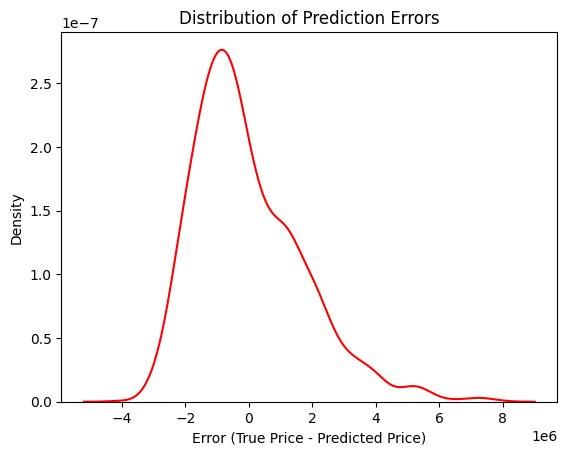

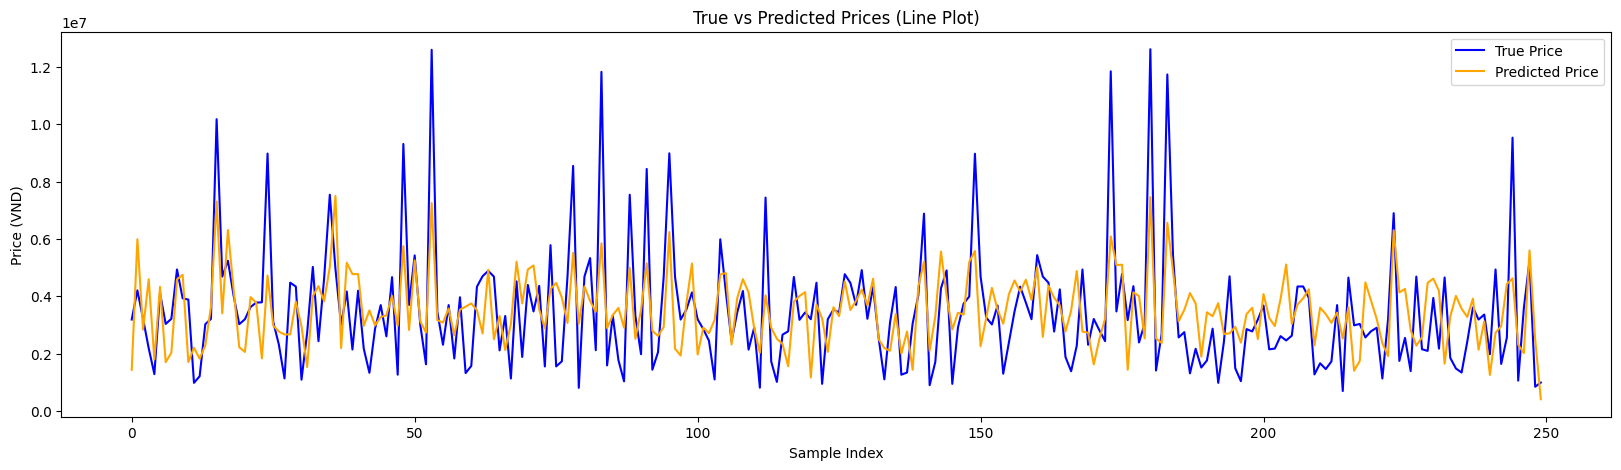

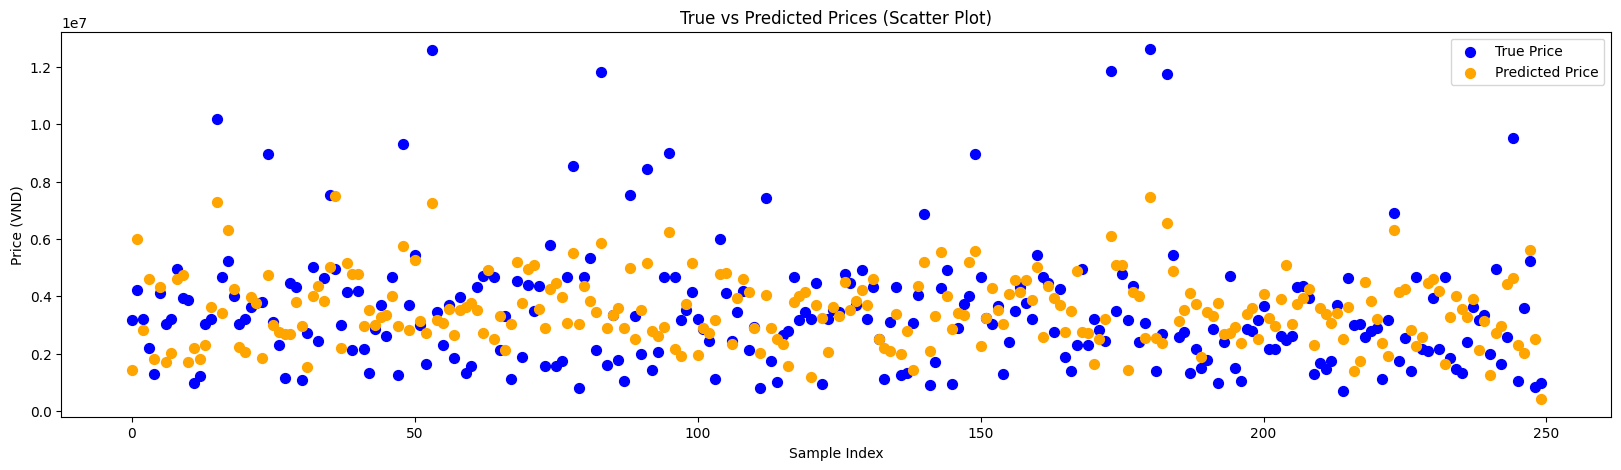

In [251]:
predictions_lr, training_score_lr, valing_score_lr, MAE_lr, MSE_lr, RMSE_lr = predict(lr, X_train, X_val)
plot(predictions_lr, y_val)

MAE: 1370790.4768135648
RMSE: 1738483.438978655
MAPE: 0.5526096143084245
R2: 0.35110081710635066


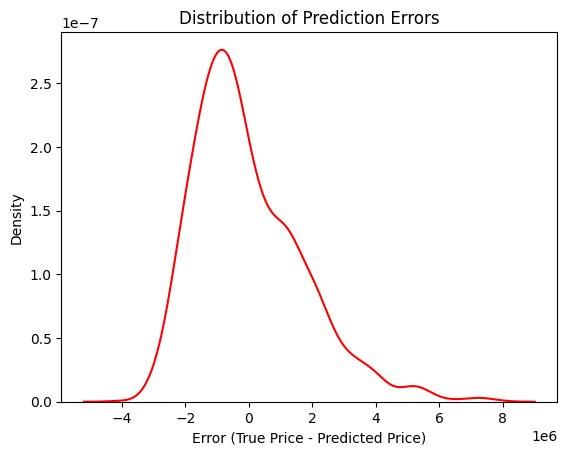

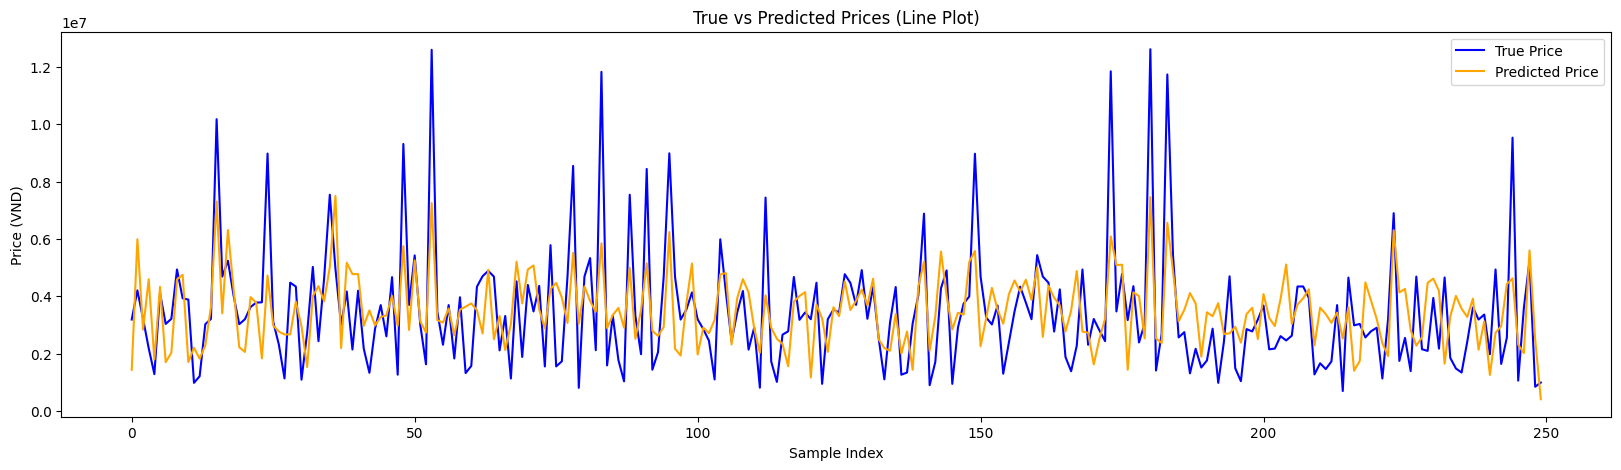

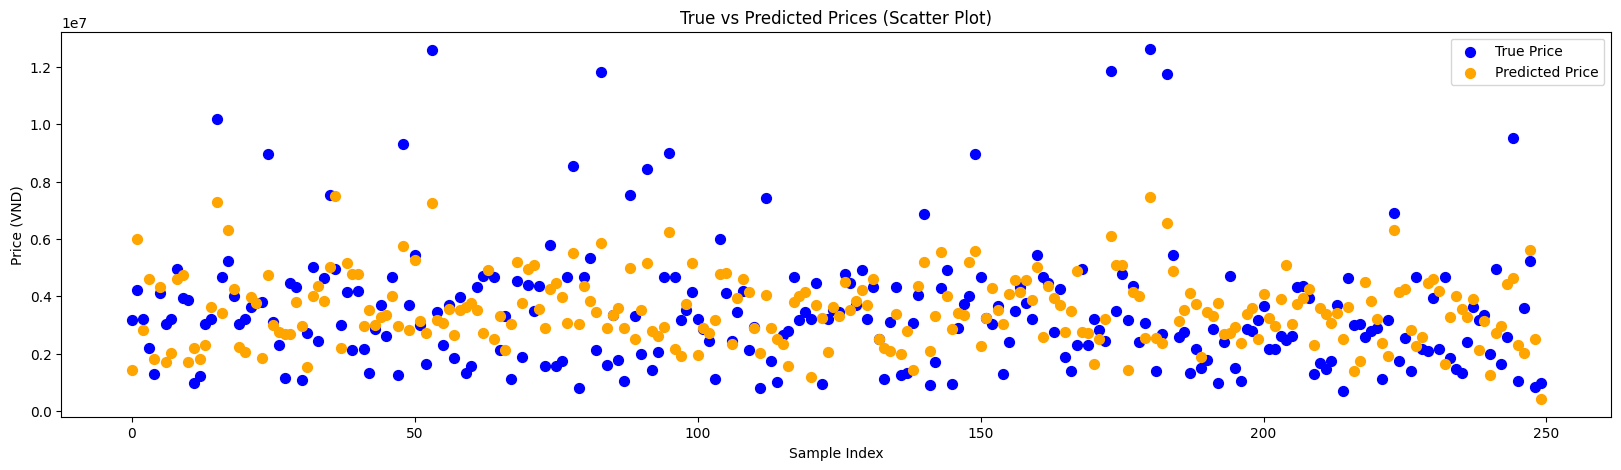

In [252]:
if isinstance(y_train, (pd.Series, pd.DataFrame)):
    y_train = y_train.values.reshape(-1, 1)
    y_val = y_val.values.reshape(-1, 1)
elif y_train.ndim == 1:
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

linear_y_pred = linear_reg.predict(X_val_scaled)

# Đánh giá mô hình
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Calculate evaluation metrics
linear_score_mae = mean_absolute_error(y_val, linear_y_pred)
linear_score_rmse = np.sqrt(mean_squared_error(y_val, linear_y_pred))
linear_score_mape = mean_absolute_percentage_error(y_val, linear_y_pred)
linear_score_r2 = r2_score(y_val, linear_y_pred)

# Print results
print("MAE:", linear_score_mae)
print("RMSE:", linear_score_rmse)
print("MAPE:", linear_score_mape)
print("R2:", linear_score_r2)

# Vẽ biểu đồ
plot(linear_y_pred.flatten(), y_val.flatten())

# Tinh chỉnh siêu tham số của mô hình

Best Linear Regression Parameters: {'fit_intercept': True}
Validation MAE: 1370790.4768135648
Validation RMSE: 1738483.438978655
Validation MAPE: 0.5526096143084245
Validation R2: 0.35110081710635066


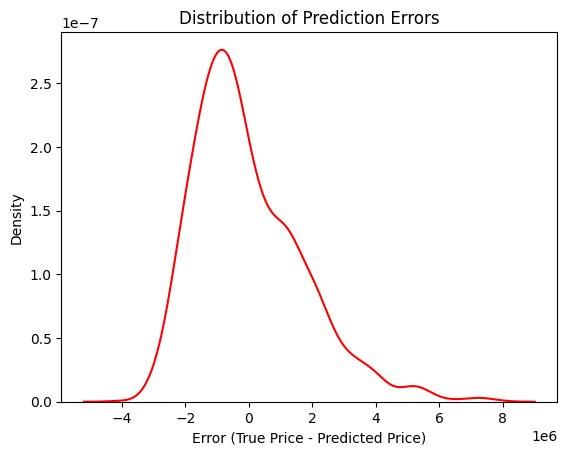

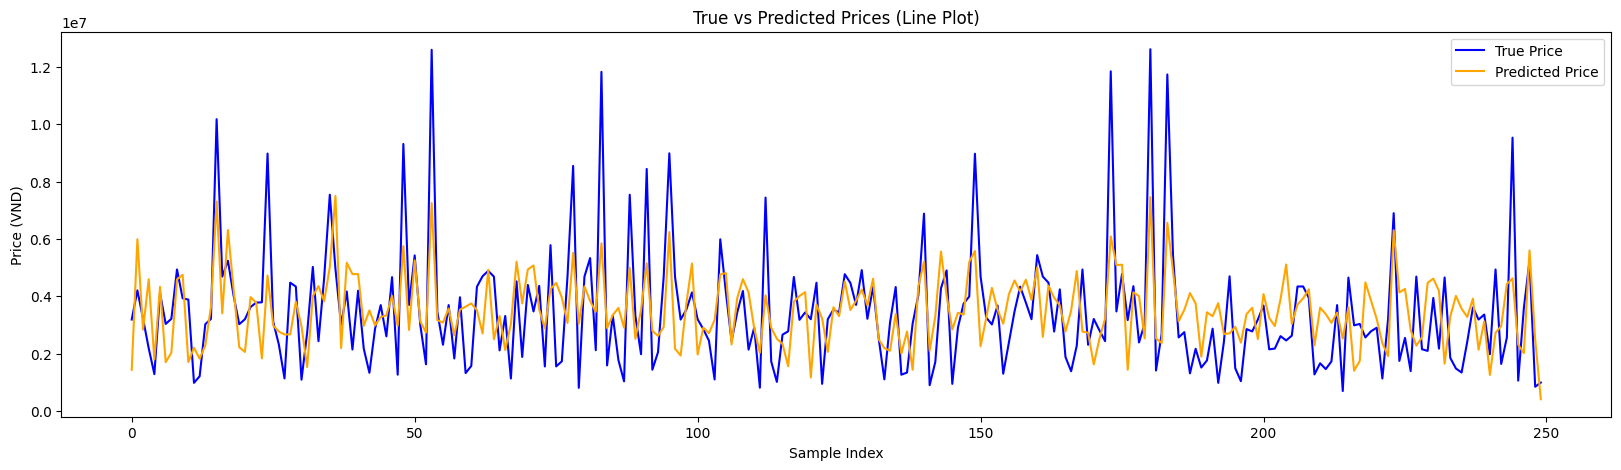

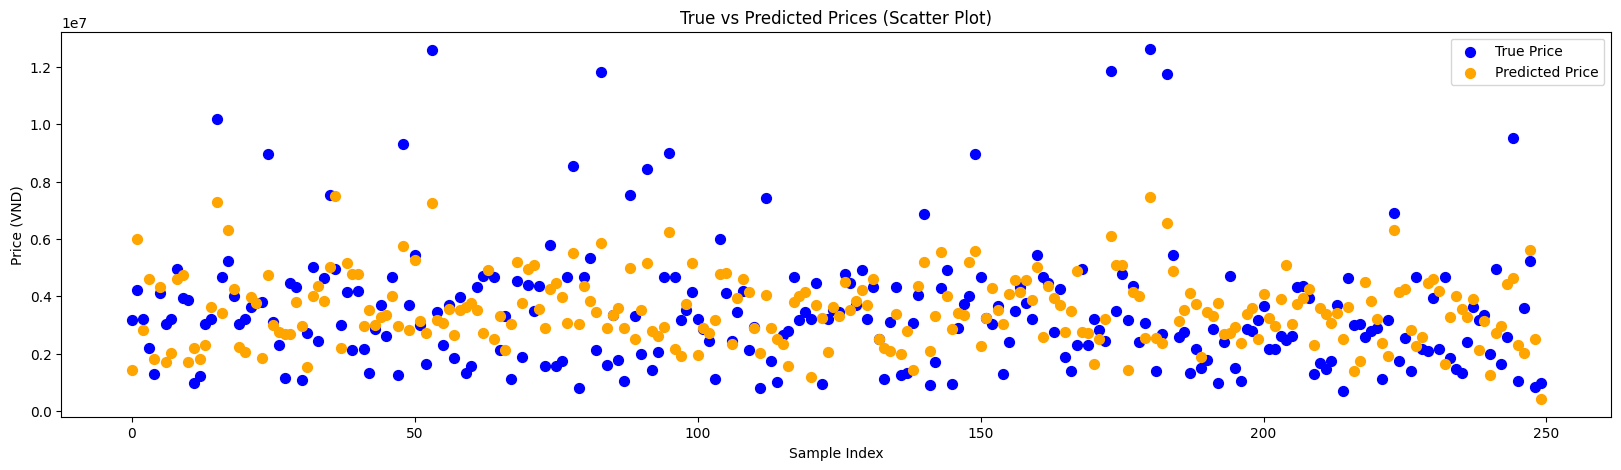

In [253]:
# Define the parameter grid for Linear Regression
param_grid = {'fit_intercept': [True, False]}

# Initialize Linear Regression model
linear_model = LinearRegression()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_linear_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the validation set
y_val_pred = best_linear_model.predict(X_val_scaled)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
mape = mean_absolute_percentage_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the results
print("Best Linear Regression Parameters:", best_params)
print("Validation MAE:", mae)
print("Validation RMSE:", rmse)
print("Validation MAPE:", mape)
print("Validation R2:", r2)

plot(y_val_pred.flatten(), y_val.flatten())

### Kiểm tra kết quả dự đoán

Model: LinearRegression()
╒════════════════╤══════════════════╕
│ Metrics        │           Values │
╞════════════════╪══════════════════╡
│ Training score │             0.33 │
├────────────────┼──────────────────┤
│ valing score   │             0.35 │
├────────────────┼──────────────────┤
│ MAE            │       1370790.48 │
├────────────────┼──────────────────┤
│ MSE            │ 3022324667603.05 │
├────────────────┼──────────────────┤
│ RMSE           │       1738483.44 │
╘════════════════╧══════════════════╛


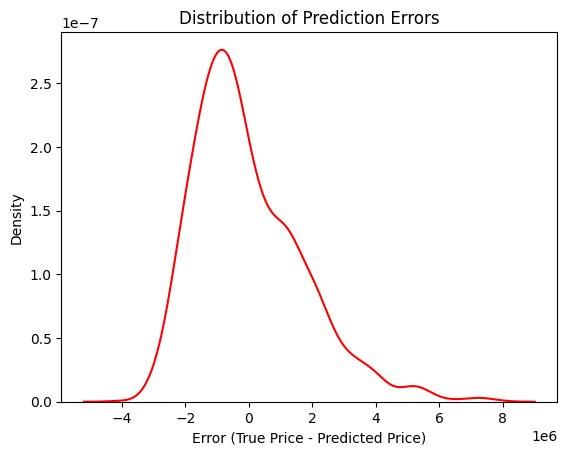

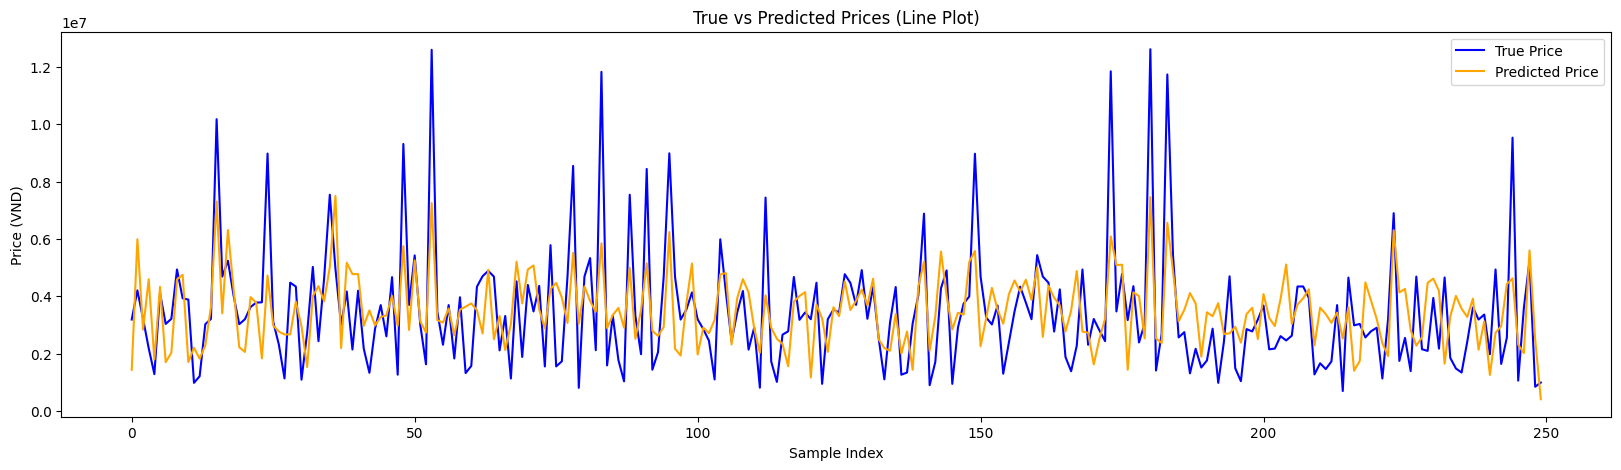

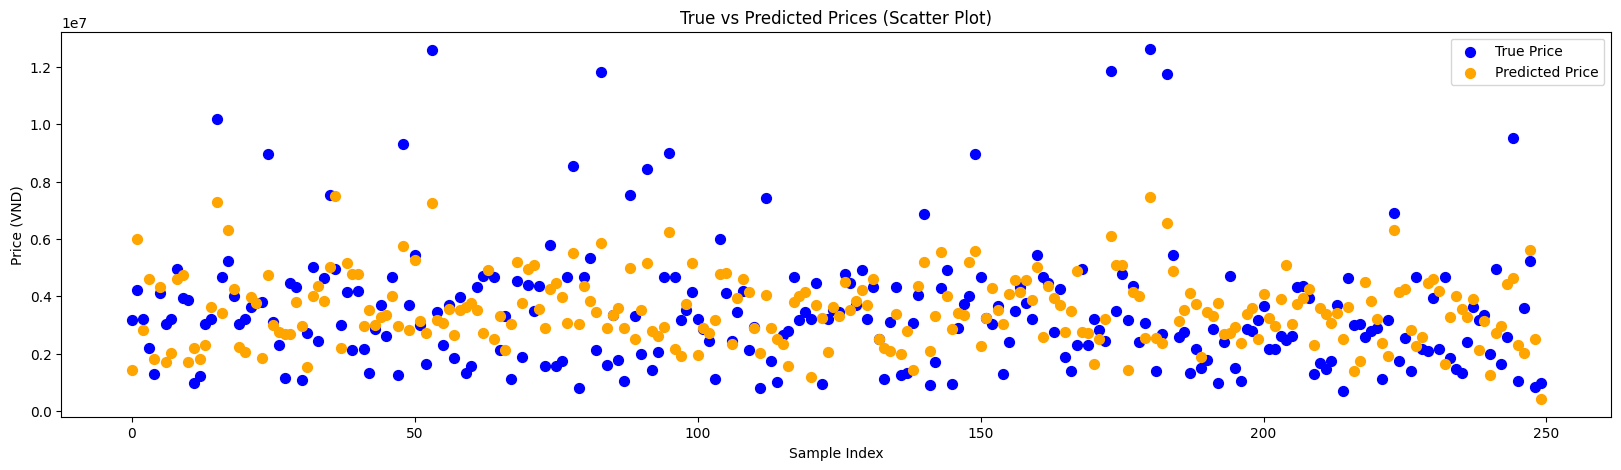

In [267]:
predictions_lr_para, training_score_lr_para, valing_score_lr_para, MAE_lr_para, MSE_lr_para, RMSE_lr_para = predict(best_linear_model, X_train, X_val)
plot(predictions_lr_para, y_val)

#### Nhận xét: Việc tinh chỉnh siêu tham số không làm cải thiện được hiệu suất mô hình, có thể do mô hình linear regression không nắm bắt được sự biến động phức tạp của dữ liệu

### Thử nghiệm tinh chỉnh mô hình với regularization 

In [255]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Define a function to evaluate models with regularization
def evaluate_regularization_models(X_train, X_val, y_train, y_val):
    models = {
        "Lasso": Lasso(alpha=0.01),
        "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5)
    }
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mape = mean_absolute_percentage_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        results.append({"Model": name, "MAE": mae, "RMSE": rmse, "MAPE": mape, "R2": r2})

    return pd.DataFrame(results)

# Evaluate the models
regularization_results = evaluate_regularization_models(X_train_scaled, X_val_scaled, y_train, y_val)

# Display the results
print(regularization_results)


        Model           MAE          RMSE      MAPE        R2
0       Lasso  1.370790e+06  1.738483e+06  0.552610  0.351101
1  ElasticNet  1.370764e+06  1.739356e+06  0.552981  0.350449


Model: LinearRegression()


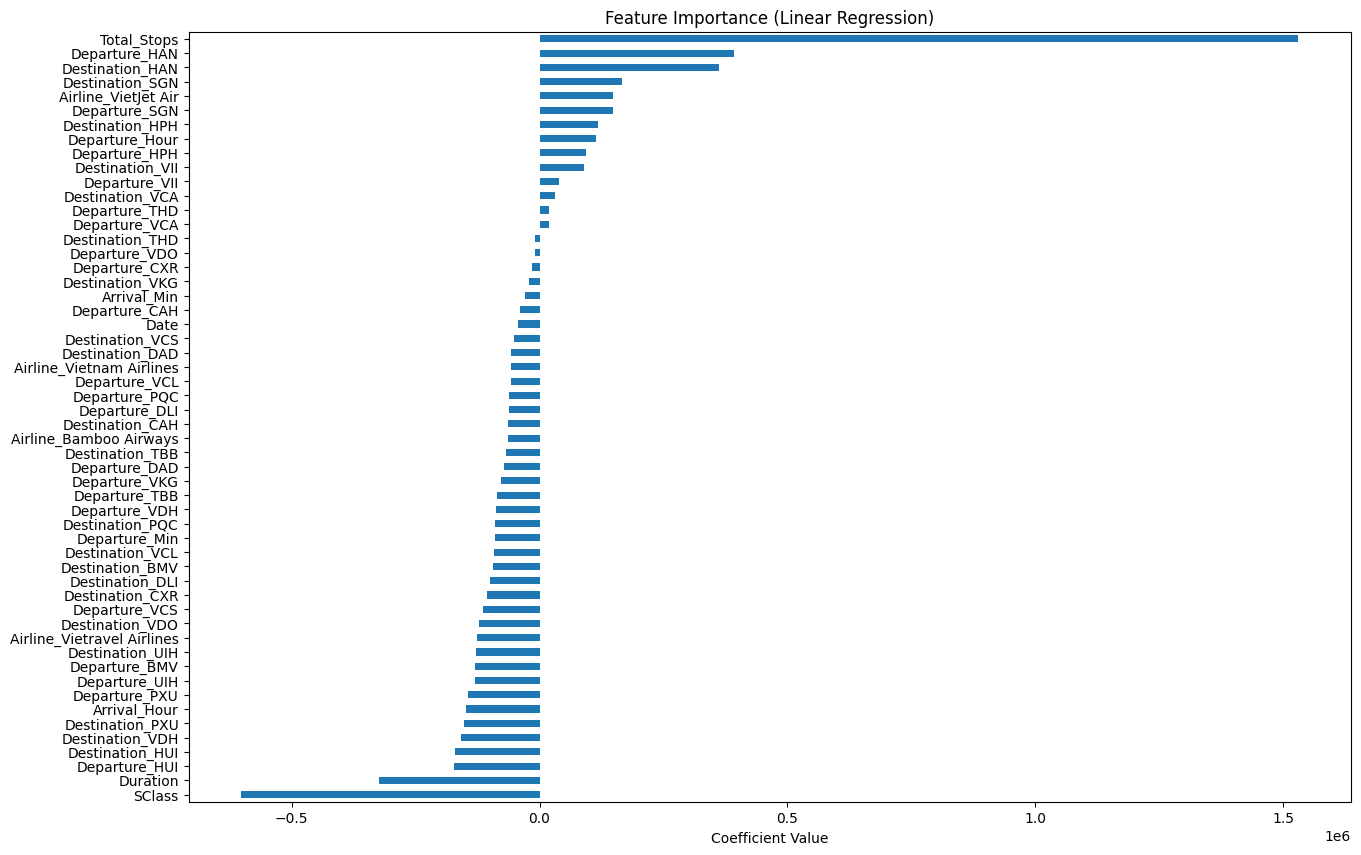

In [256]:
def feature_importance_linear(ml_model, feature_names):
    print('Model: {}'.format(ml_model))
    model = ml_model.fit(X_train_scaled, y_train)
    plt.figure(figsize=(15, 10))
    feat_importances = pd.Series(model.coef_.flatten(), index=feature_names).sort_values(ascending=True)
    feat_importances.plot(kind='barh')
    plt.xlabel("Coefficient Value")
    plt.title("Feature Importance (Linear Regression)")
    plt.show()

# Call the updated function with LinearRegression
ln_model = LinearRegression()
feature_importance_linear(ln_model, X_train.columns)

### Từ đây có thể chọn ra được 3 đặc trưng quan trọng cho mô hình: ['SClass', 'Duration', 'Total_Stops']

In [321]:
# Select the desired columns from the original DataFrame before scaling
selected_features = ['SClass', 'Duration', 'Total_Stops']
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
linear_reg_s = LinearRegression()
linear_reg_s.fit(X_train_selected, y_train)
linear_y_pred_s = linear_reg_s.predict(X_val_selected)

Model: LinearRegression()
╒════════════════╤══════════════════╕
│ Metrics        │           Values │
╞════════════════╪══════════════════╡
│ Training score │             0.22 │
├────────────────┼──────────────────┤
│ valing score   │             0.24 │
├────────────────┼──────────────────┤
│ MAE            │       1489278.57 │
├────────────────┼──────────────────┤
│ MSE            │ 3546322868336.50 │
├────────────────┼──────────────────┤
│ RMSE           │       1883168.31 │
╘════════════════╧══════════════════╛


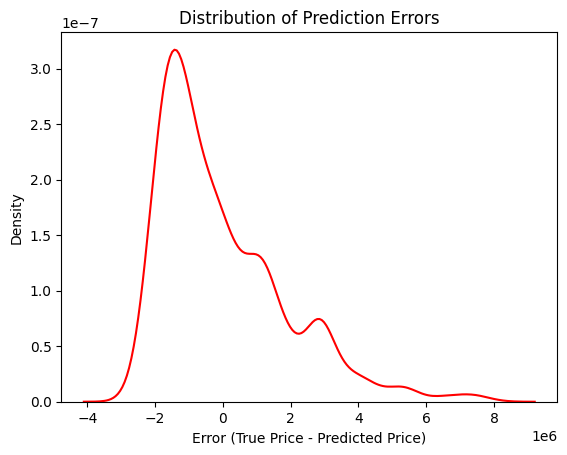

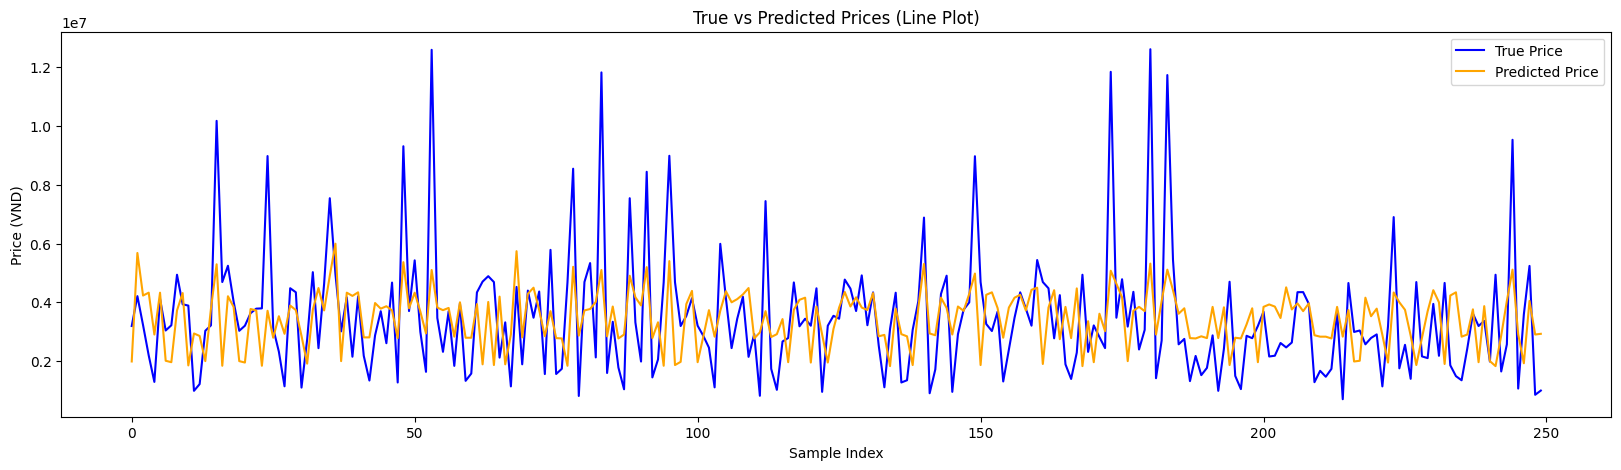

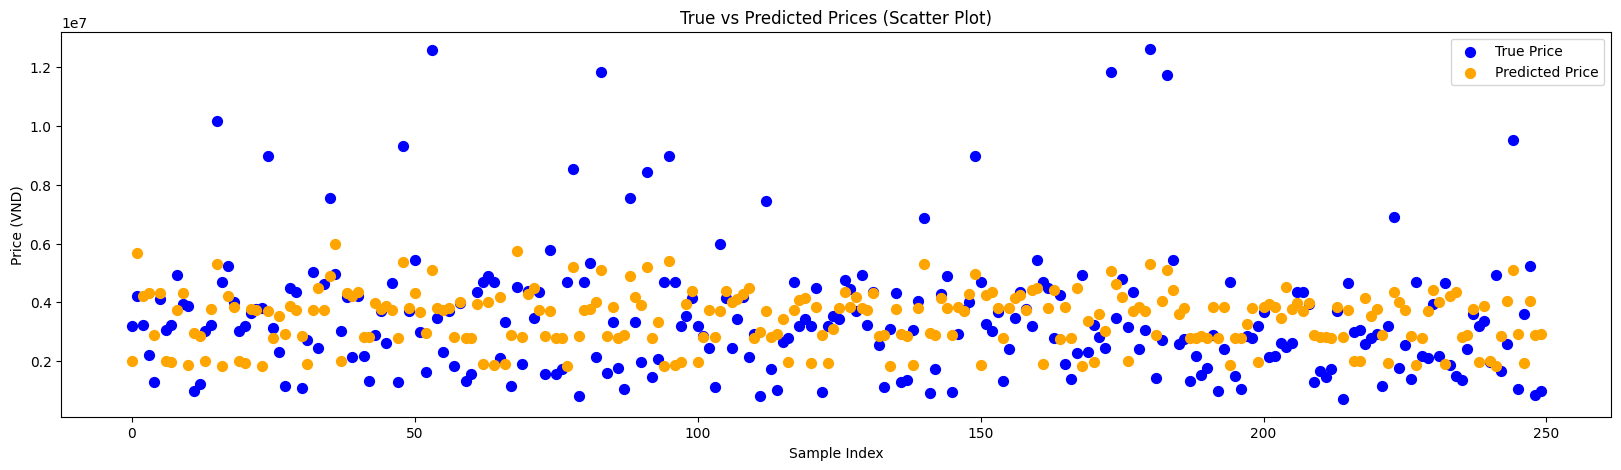

In [322]:
predictions_lr_fs, training_score_lr_fs, valing_score_lr_fs, MAE_lr_fs, MSE_lr_fs, RMSE_lr_fs = predict(lr, X_train_selected, X_val_selected)
plot(predictions_lr_fs, y_val)

### So sánh metric trước và sau khi lựa chọn đặc trưng

In [ ]:

print('Model: {}'.format(lr))
table_rf = []
table_rf.append(['', 'Without Feature Selection', 'With Feature Selection'])
table_rf.append(['Training score', training_score_lr, training_score_lr_fs])
table_rf.append(['Evaluation score', valing_score_lr, valing_score_lr_fs])
table_rf.append(['MAE', MAE_lr, MAE_lr_fs])
table_rf.append(['MSE', MSE_lr, MSE_lr_fs])
table_rf.append(['RMSE', RMSE_lr, RMSE_lr_fs])
print(tabulate(table_rf, headers='firstrow', tablefmt='fancy_grid', numalign='right', floatfmt=".2f"))

Model: LinearRegression()
╒══════════════════╤═════════════════════════════╤══════════════════════════╕
│                  │   Without Feature Selection │   With Feature Selection │
╞══════════════════╪═════════════════════════════╪══════════════════════════╡
│ Training score   │                        0.33 │                     0.22 │
├──────────────────┼─────────────────────────────┼──────────────────────────┤
│ Evaluation score │                        0.35 │                     0.24 │
├──────────────────┼─────────────────────────────┼──────────────────────────┤
│ MAE              │                  1370790.48 │               1489278.57 │
├──────────────────┼─────────────────────────────┼──────────────────────────┤
│ MSE              │            3022324667603.05 │         3546322868336.50 │
├──────────────────┼─────────────────────────────┼──────────────────────────┤
│ RMSE             │                  1738483.44 │               1883168.31 │
╘══════════════════╧══════════════════

## Xử lý dữ liệu outlier

In [270]:
from scipy.stats.mstats import winsorize
import numpy as np

# Winsorizing: Cắt đuôi dữ liệu ở mức 1% thấp nhất và cao nhất
def apply_winsorizing(data, lower_percentile=0.01, upper_percentile=0.99):
    winsorized_data = winsorize(data, limits=(lower_percentile, 1 - upper_percentile))
    return winsorized_data

# Log-transform: Chuyển đổi cột Price sang log(Price)
def apply_log_transform(data, column_name):
    data[f'log_{column_name}'] = np.log(data[column_name])
    return data

y_train_winsorized = apply_winsorizing(y_train, lower_percentile=0.01, upper_percentile=0.99)
y_val_winsorized = apply_winsorizing(y_val, lower_percentile=0.01, upper_percentile=0.99)

# Chuyển đổi dữ liệu thành log(Price)
val_data = apply_log_transform(valset, 'Price')
train_data = apply_log_transform(trainset, 'Price')

# Cập nhật y_train và y_val với log-transform
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

# In kết quả để kiểm tra
print("Winsorized Price (first 5 values):", y_train_winsorized[:5])
print("Log-transformed Price (first 5 values):", train_data['log_Price'].head())

print("\n")
print("Winsorized Price (first 5 values):", y_val_winsorized[:5])
print("Log-transformed Price (first 5 values):", val_data['log_Price'].head())

Winsorized Price (first 5 values): [[2654000]
 [8983000]
 [1735000]
 [1859000]
 [2536000]]
Log-transformed Price (first 5 values): 0    14.791578
1    16.010844
2    14.366518
3    14.435549
4    14.746099
Name: log_Price, dtype: float64


Winsorized Price (first 5 values): [[3189800]
 [4208000]
 [3220000]
 [2188000]
 [1286000]]
Log-transformed Price (first 5 values): 0    14.975469
1    15.252498
2    14.984892
3    14.598498
4    14.067047
Name: log_Price, dtype: float64


MAE: 0.41264909340774697
RMSE: 0.49418776602000003
MAPE: 0.027903081469496542
R2: 0.3109944903246753


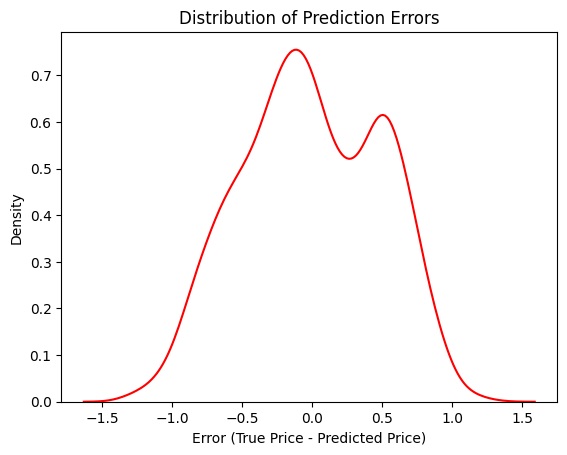

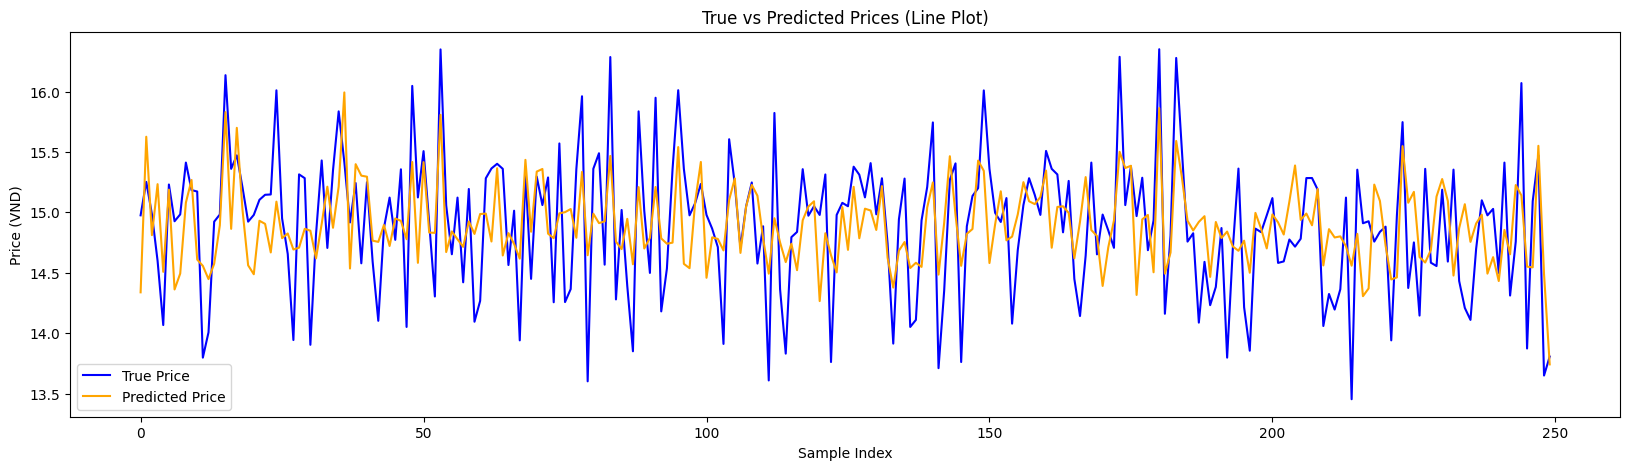

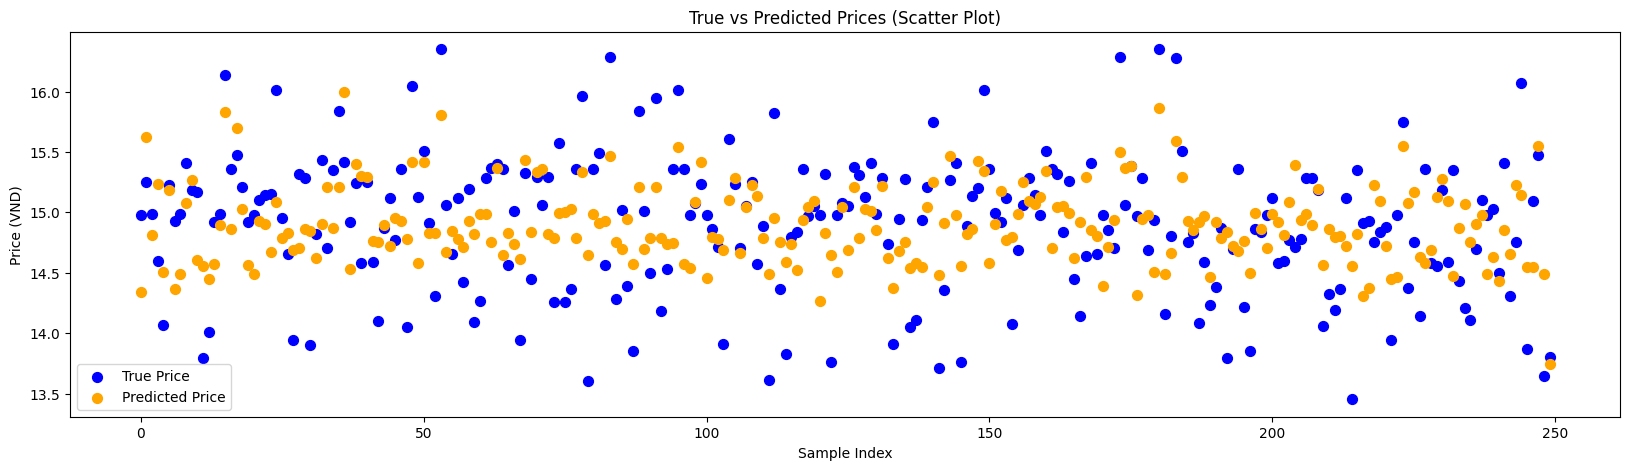

In [271]:
linear_reg_r = LinearRegression()
linear_reg_r.fit(X_train_scaled, y_train_log)  # Use fit instead of train
linear_y_pred_r = linear_reg_r.predict(X_val_scaled)

# Đánh giá mô hình
linear_score_mae = mean_absolute_error(y_val_log, linear_y_pred_r)
linear_score_rmse = np.sqrt(mean_squared_error(y_val_log, linear_y_pred_r))
linear_score_mape = mean_absolute_percentage_error(y_val_log, linear_y_pred_r)
linear_r2 = r2_score(y_val_log, linear_y_pred_r)

# In kết quả
print("MAE:", linear_score_mae)
print("RMSE:", linear_score_rmse)
print("MAPE:", linear_score_mape)
print("R2:", linear_r2)

# Vẽ biểu đồ
plot(linear_y_pred_r.flatten(), y_val_log.flatten())  # Use the existing plot function

## Triển khai mô hình trên Test data

In [311]:
X_test = testset.drop(["Price"] , axis=1)
y_test = testset["Price"]
selected_features = ['SClass', 'Duration', 'Total_Stops']
X_test_lr = X_test[selected_features]
y_test_lr = testset["Price"]
X_test_lr = X_test_lr.reset_index(drop=True)
y_test_lr = y_test.reset_index(drop=True)
X_test_scaled = scaler.transform(X_test)


### Kết quả mô hình gốc trên dữ liệu test

Test MAE: 1363025.4912903863
Test RMSE: 1737388.4766577699
Test MAPE: 0.5407057999165866
Test R2: 0.3732014265225234


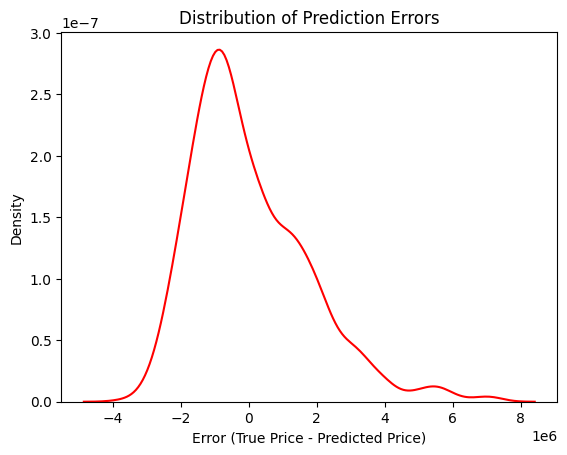

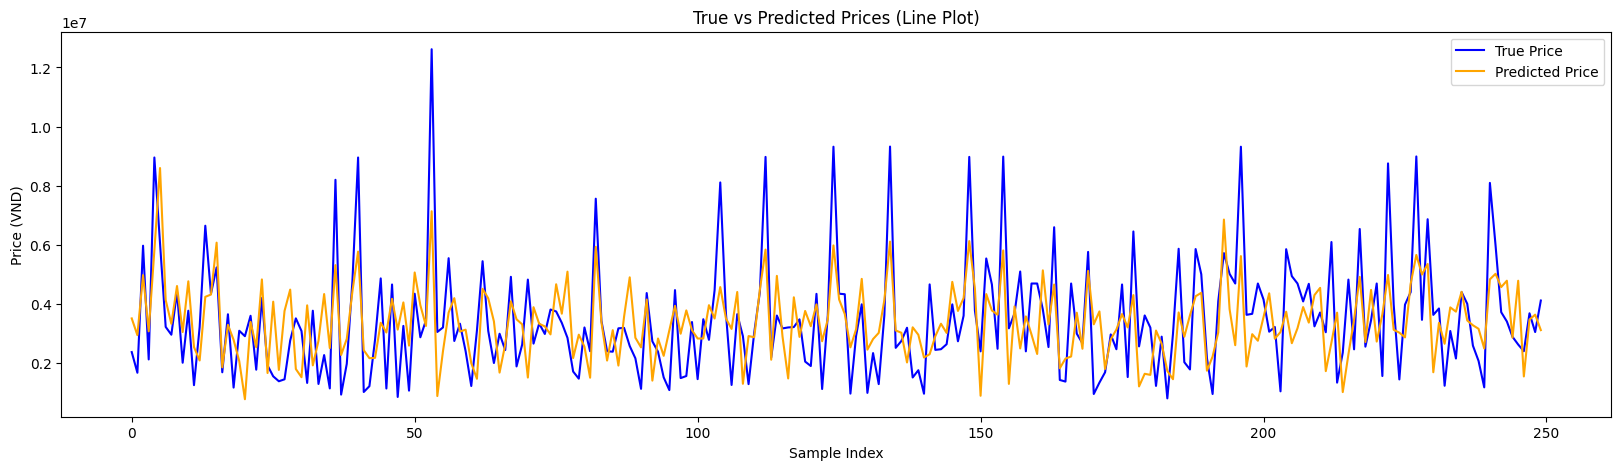

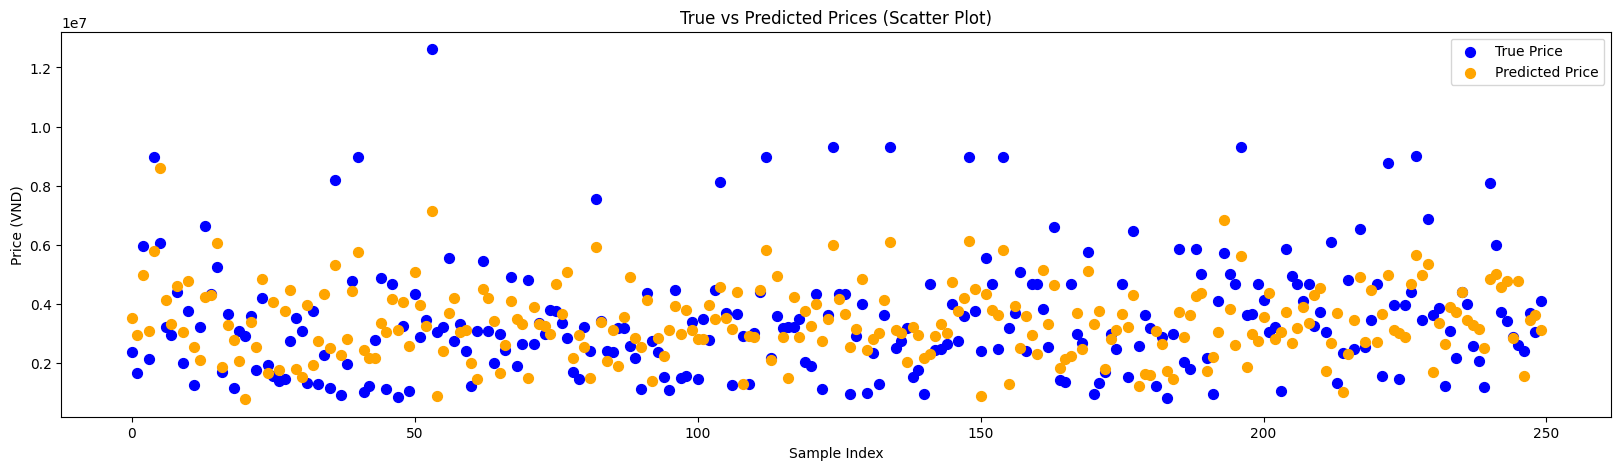

In [313]:
# Perform inference on the test data
y_test_pred = linear_reg.predict(X_test_scaled)

# Evaluate the model on the test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

test_mae = mean_absolute_error(y_test.values, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test.values, y_test_pred))
test_mape = mean_absolute_percentage_error(y_test.values, y_test_pred)
test_r2 = r2_score(y_test.values, y_test_pred)

# Print the evaluation metrics
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MAPE:", test_mape)
print("Test R2:", test_r2)

# Plot the actual vs predicted values
plot(y_test_pred.flatten(), y_test.values.flatten())

### Áp dụng xử lý outliers trên dữ liệu test

In [292]:
y_test_winsorized = apply_winsorizing(y_test, lower_percentile=0.01, upper_percentile=0.99)

# Chuyển đổi dữ liệu thành log(Price)
test_data = apply_log_transform(testset, 'Price')

# Cập nhật y_train và y_val với log-transform
y_test_log = np.log(y_test)

# In kết quả để kiểm tra
print("Winsorized Price (first 5 values):", y_test_winsorized[:5])
print("Log-transformed Price (first 5 values):", test_data['log_Price'].head())



Winsorized Price (first 5 values): [2366000 1666900 5967000 2117000 8953000]
Log-transformed Price (first 5 values): 0    14.676711
1    14.326476
2    15.601755
3    14.565511
4    16.007499
Name: log_Price, dtype: float64


In [323]:
def plot_test_log(predictions):
    sns.distplot(y_test_log - predictions, kde=True, hist=False, color='red')
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error (True Price - Predicted Price)")
    plt.ylabel("Density")
    plt.show()
    
    fig1, ax = plt.subplots(1, 1, figsize=(20, 5))

    ax.plot([i for i in range(250)], y_test_log[:250], color='blue', label='True Price')
    ax.plot([i for i in range(250)], predictions[:250], color='orange', label='Predicted Price')

    ax.set_ylabel("Price (VND)")
    ax.set_xlabel("Sample Index")
    ax.legend()
    plt.title("True vs Predicted Prices (Line Plot)")
    plt.show()
    
    fig2, ax = plt.subplots(1, 1, figsize=(20, 5))

    ax.scatter([i for i in range(250)], y_test_log[:250], color='blue', label='True Price', s=50)
    ax.scatter([i for i in range(250)], predictions[:250], color='orange', label='Predicted Price', s=50)
    
    ax.set_ylabel("Price (VND)")
    ax.set_xlabel("Sample Index")
    ax.legend()
    plt.title("True vs Predicted Prices (Scatter Plot)")
    plt.show()

### Kiểm tra kết quả dự đoán trên tập test

Test MAE (log-transformed): 0.4089643044223947
Test RMSE (log-transformed): 0.4919670701626513
Test MAPE (log-transformed): 0.027635281151003374
Test R2 (log-transformed): 0.32804887155919904


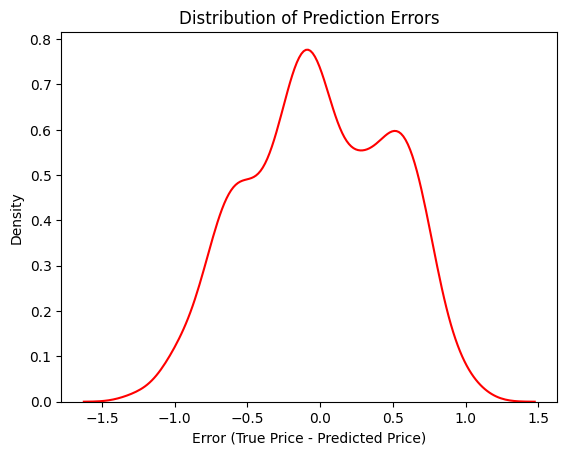

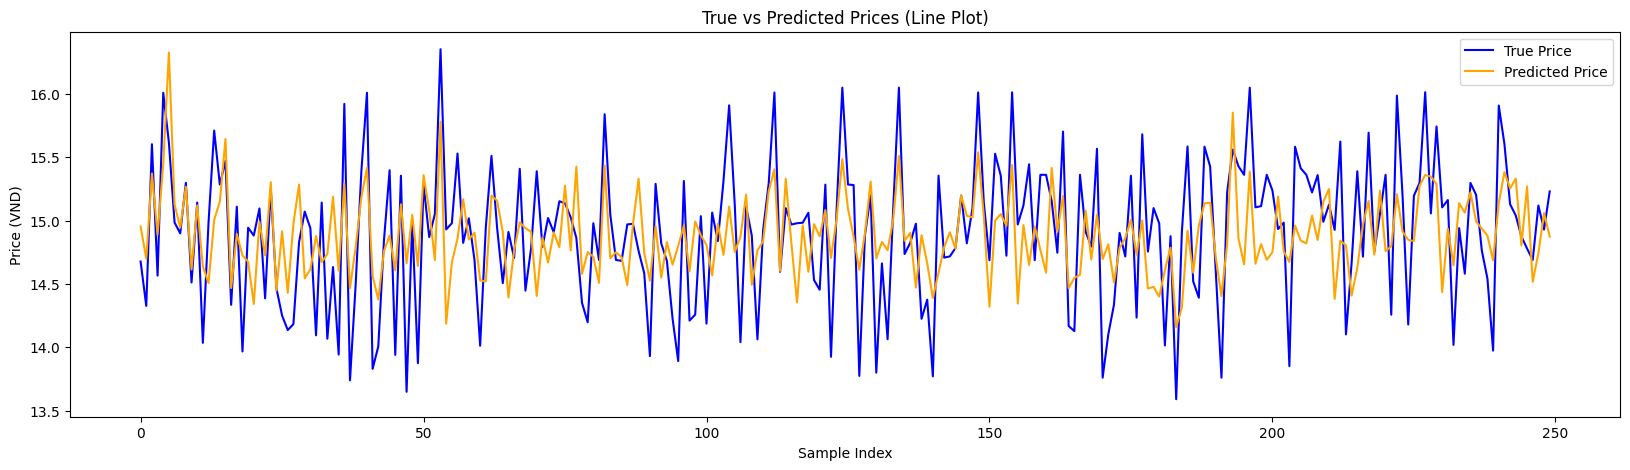

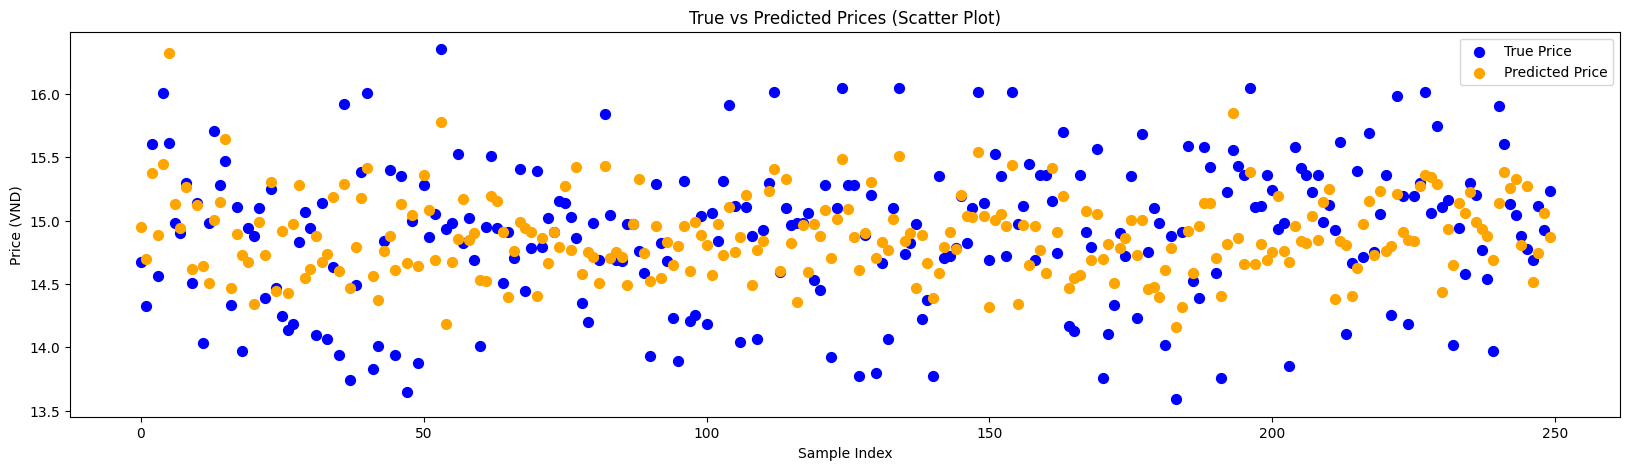

In [324]:
y_test_log = np.log(y_test)
y_test_pred_log = linear_reg_r.predict(X_test_scaled)
# Evaluate the model on the test data with log-transformed target variable  
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
test_mae_log = mean_absolute_error(y_test_log, y_test_pred_log)
test_rmse_log = np.sqrt(mean_squared_error(y_test_log, y_test_pred_log))
test_mape_log = mean_absolute_percentage_error(y_test_log, y_test_pred_log)
test_r2_log = r2_score(y_test_log, y_test_pred_log)
# Print the evaluation metrics
print("Test MAE (log-transformed):", test_mae_log)
print("Test RMSE (log-transformed):", test_rmse_log)        
print("Test MAPE (log-transformed):", test_mape_log)
print("Test R2 (log-transformed):", test_r2_log)
# Vẽ biểu đồ
plot(y_test_pred_log.flatten(), y_test_log)

In [325]:
test_r2  = linear_reg_r.score(X_test_scaled, y_test_log)

# Compute error metrics on the test set
mae   = mean_absolute_error(y_test_log, y_test_pred_log)
mse   = mean_squared_error(y_test_log, y_test_pred_log)
rmse  = np.sqrt(mse)
r2    = r2_score(y_test_log, y_test_pred_log)

# print(f"Test R²:  {test_r2:.3f}")
print(f"MAE:       {mae:.3f}")
print(f"MSE:       {mse:.3f}")
print(f"RMSE:      {rmse:.3f}")
print(f"R² (alt):  {r2:.3f}")   
metrics_table = [
    ["Metric", "Value"],
    ["MAE", f"{mae:.3f}"],
    ["MSE", f"{mse:.3f}"],
    ["RMSE", f"{rmse:.3f}"],
    ["R² (alt)", f"{r2:.3f}"]
]

# Print the table
print(tabulate(metrics_table, headers="firstrow", tablefmt="fancy_grid", numalign ='right', floatfmt=".3f"))

MAE:       0.409
MSE:       0.242
RMSE:      0.492
R² (alt):  0.328
╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │   0.409 │
├──────────┼─────────┤
│ MSE      │   0.242 │
├──────────┼─────────┤
│ RMSE     │   0.492 │
├──────────┼─────────┤
│ R² (alt) │   0.328 │
╘══════════╧═════════╛
